In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Read the training data from the provided CSV file.
csv = pd.read_csv('HW_CLUSTERING_SHOPPING_CART_v2215H.csv')

In [3]:
csv

,ID,Milk,ChildBby,Vegges,Cereal,Bread,Rice,Meat,Eggs,YogChs,...,Soda,Fruit,Corn,Fish,Sauce,Beans,Tortya,Salt,Scented,Salza
0,1,7,4,10,4,0,7,4,5,8,...,4,5,5,5,1,6,6,3,2,2
1,2,4,6,9,6,0,9,1,6,8,...,1,5,3,1,1,5,5,5,0,3
2,3,3,3,3,7,5,5,9,3,0,...,6,6,9,4,8,3,7,5,5,5
3,4,1,1,2,10,3,6,8,2,1,...,9,4,9,4,7,3,8,4,8,3
4,5,2,4,4,8,3,5,9,3,0,...,9,7,8,3,6,5,7,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1196,5,5,3,7,4,6,6,4,7,...,2,3,2,8,2,7,5,4,6,3
1196,1197,2,2,3,8,2,8,10,5,0,...,9,6,5,2,7,2,8,5,6,5
1197,1198,3,0,5,6,7,5,4,8,2,...,2,4,5,4,3,6,7,4,5,3
1198,1199,6,6,8,7,0,8,5,4,8,...,1,5,4,2,4,4,8,8,1,4


## Feature selection and rejection using cross-correlation
---

In [4]:
# Remove the ID column and store the agglomeration data in a numpy array for computations.
data = csv.drop(columns='ID').to_numpy()

In [5]:
# Calculate the cross-correlation matrix for our data.
cross_correlation = csv.drop(columns='ID').corr()

In [6]:
cross_correlation

,Milk,ChildBby,Vegges,Cereal,Bread,Rice,Meat,Eggs,YogChs,Chips,Soda,Fruit,Corn,Fish,Sauce,Beans,Tortya,Salt,Scented,Salza
Milk,1.000000,0.724912,0.596655,0.012550,0.567789,0.114213,0.042032,0.005595,0.389736,-0.645840,-0.587896,-0.010385,-0.413156,-0.012976,-0.572722,-0.002528,-0.770248,-0.021322,0.005485,-0.558272
ChildBby,0.724912,1.000000,0.606057,-0.056379,0.273316,0.192455,-0.082229,-0.035054,0.493624,-0.759637,-0.575480,-0.004554,-0.449085,-0.215120,-0.548162,0.003829,-0.630203,-0.005174,-0.228831,-0.473043
Vegges,0.596655,0.606057,1.000000,-0.308489,0.120774,0.235282,-0.429646,-0.012470,0.756416,-0.693511,-0.828185,0.028170,-0.643436,0.053057,-0.614205,0.032800,-0.342661,-0.007213,-0.416476,-0.612245
Cereal,0.012550,-0.056379,-0.308489,1.000000,0.283175,-0.136555,0.382501,0.039475,-0.398330,0.191365,0.333111,0.019417,0.295761,-0.085436,0.163354,-0.026094,-0.186405,0.015747,0.369454,0.165322
Bread,0.567789,0.273316,0.120774,0.283175,1.000000,-0.098644,0.409288,0.032940,-0.123281,-0.035798,-0.178201,-0.024026,-0.037396,0.243682,-0.331484,0.011199,-0.677796,-0.019871,0.527960,-0.378654
Rice,0.114213,0.192455,0.235282,-0.136555,-0.098644,1.000000,-0.175254,-0.011825,0.245934,-0.259028,-0.227061,-0.004895,-0.179102,-0.084474,-0.158963,0.006464,-0.049994,0.010589,-0.252247,-0.117025
Meat,0.042032,-0.082229,-0.429646,0.382501,0.409288,-0.175254,1.000000,0.022824,-0.541978,0.281230,0.422515,-0.012998,0.367263,-0.037225,0.185179,-0.013167,-0.291535,-0.013418,0.537521,0.171064
Eggs,0.005595,-0.035054,-0.012470,0.039475,0.032940,-0.011825,0.022824,1.000000,-0.050303,0.009171,0.045787,0.031372,0.019362,-0.035910,0.025142,-0.019794,-0.026907,-0.019447,0.036162,0.006841
YogChs,0.389736,0.493624,0.756416,-0.398330,-0.123281,0.245934,-0.541978,-0.050303,1.000000,-0.619593,-0.771100,0.014094,-0.618044,0.042580,-0.510828,0.048966,-0.107419,0.015329,-0.552168,-0.548495
Chips,-0.645840,-0.759637,-0.693511,0.191365,-0.035798,-0.259028,0.281230,0.009171,-0.619593,1.000000,0.644771,-0.016462,0.521243,0.278228,0.519824,-0.013814,0.489518,0.019686,0.447935,0.411926


### Which two attributes are most strongly cross-correlated with each other?

In [7]:
# Remove the diagonal and lower triangle parts of the correlation matrix:
columns = csv.drop(columns='ID').columns
dropped_labels = set()
for index_i, column_i in enumerate(columns):
    for index_j, column_j in enumerate(columns[:index_i+1]):
        dropped_labels.add( (column_i, column_j) )

In [8]:
# Sort by absolute cross correlation:
sorted_absolute_cross_correlations = cross_correlation.abs().unstack().drop( labels = dropped_labels ).sort_values(ascending=False)
print('Most strongly cross-correlated:\n',sorted_absolute_cross_correlations[:1])

Most strongly cross-correlated:
 Vegges    Soda    0.828185
dtype: float64


In [9]:
print('Veggies/Soda cross-correlation:',cross_correlation['Vegges']['  Soda'])

Veggies/Soda cross-correlation: -0.8281846843848794


> Veggies and Soda are most strongly cross-correlated (negatively).

###  What is the cross-correlation coefficient of Chips with cereal?

In [10]:
print('Chips/Cereal cross-correlation:',cross_correlation[' Chips']['Cereal'])

Chips/Cereal cross-correlation: 0.1913648343343702


###  Which attribute is fish most strongly cross-correlated with? 

In [11]:
cross_correlation['  Fish'].drop('  Fish', axis=0 ).abs().sort_values(ascending=False)[:1] 

 Chips    0.278228
Name:   Fish, dtype: float64

In [12]:
print('Fish is most storngly cross-correlated with Chips:', cross_correlation['  Fish'][' Chips'] )

Fish is most storngly cross-correlated with Chips: 0.27822785873390754


###  Which attribute is Veggies most strongly cross-correlated with? 

In [13]:
cross_correlation['Vegges'].drop('Vegges', axis=0 ).abs().sort_values(ascending=False)[:1]

  Soda    0.828185
Name: Vegges, dtype: float64

In [14]:
print('Veggies are most strongly cross-correlated with Soda:', cross_correlation['Vegges']['  Soda'])

Veggies are most strongly cross-correlated with Soda: -0.8281846843848794


### According to this data, do people usually buy milk and cereal?

In [15]:
cross_correlation['  Milk']['Cereal']

0.012549806139504077

In [16]:
print('Cross-correlation between Milk and Cereal:',cross_correlation['  Milk']['Cereal'])

Cross-correlation between Milk and Cereal: 0.012549806139504077


###  Which two attributes are not strongly cross-correlated with anything?

In [17]:
print('Last 15 absolute cross-correlations:\n\n',sorted_absolute_cross_correlations[-15:])

Last 15 absolute cross-correlations:

   Rice     Beans     0.006464
 Fruit    Scented    0.005848
  Milk      Eggs     0.005595
          Scented    0.005485
ChildBby    Salt     0.005174
  Rice     Fruit     0.004895
ChildBby   Fruit     0.004554
 Fruit     Sauce     0.004399
ChildBby   Beans     0.003829
  Milk     Beans     0.002528
 Fruit      Corn     0.002307
  Soda     Fruit     0.001837
 Sauce      Salt     0.001435
 Fruit      Salt     0.001152
  Salt    Scented    0.000963
dtype: float64


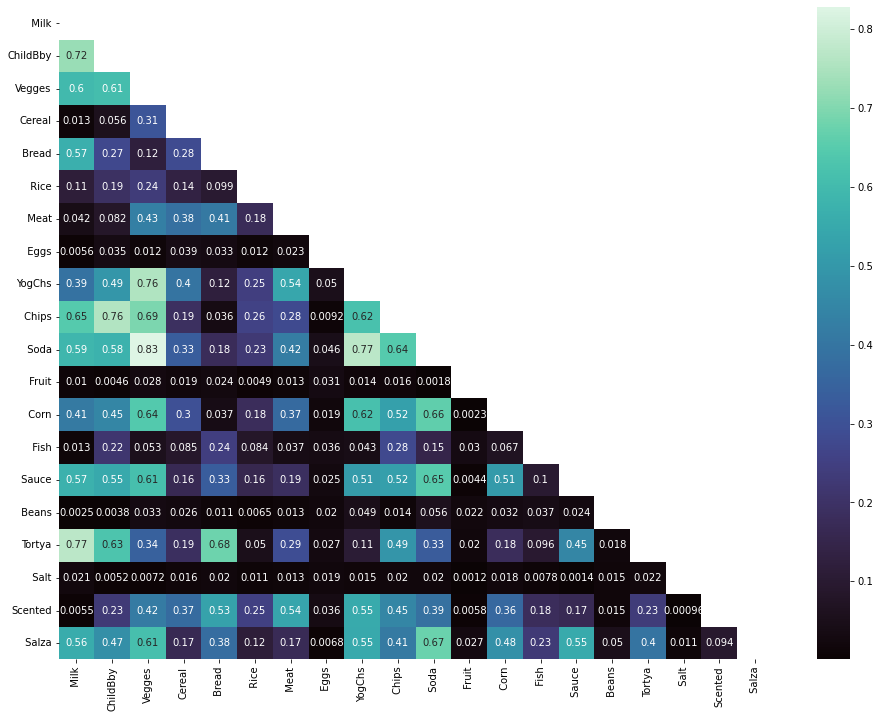

In [18]:
# Display the heatmap for cross-correlations, so as to visualize which variables yield the least cross-correlation coefficients across the board. 
plt.figure( figsize = ( 16, 12 ) )
sns.heatmap( cross_correlation.abs(), cmap='mako', annot=True, mask = np.triu(cross_correlation.abs()) )
plt.show()

In [19]:
# Store the cross-correlation values to visualize with line graphs, 
# so that we may compare them to find out which variables are least important.
salt = cross_correlation['  Salt'].drop('  Salt',axis=0).abs()
fruit = csv.drop(columns='ID').corr()[' Fruit'].drop(' Fruit', axis=0).abs()
beans = csv.drop(columns='ID').corr()[' Beans'].drop(' Beans', axis=0).abs()
cereal = csv.drop(columns='ID').corr()['Cereal'].drop('Cereal', axis=0).abs()
eggs = csv.drop(columns='ID').corr()['  Eggs'].drop('  Eggs', axis=0).abs()

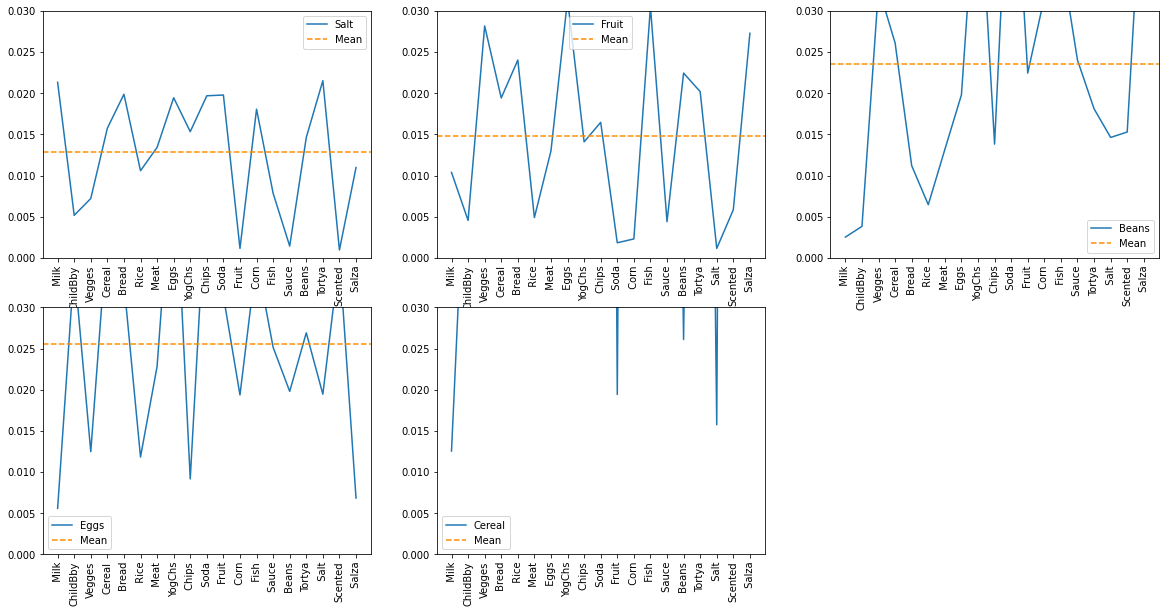

In [20]:
# Plot line graphs for the cross-correlations for the less important variables, to determine which are the least important.
# Also plot the mean values for their cross-correlation coefficients, to gain an understanding of the central tendency.
plt.figure( figsize=(20,10))

ax1 = plt.subplot(2,3,1)
ax1.set_ylim(top=0.03)
plt.plot(salt, label='Salt')
plt.axhline(np.mean(salt), label='Mean', linestyle='--', color='darkorange')
plt.xticks(rotation=90)
plt.legend()

ax2 = plt.subplot(2,3,2)
ax2.set_ylim(top=0.03)
plt.plot(fruit, label='Fruit')
plt.axhline(np.mean(fruit), label='Mean', linestyle='--', color='darkorange')
plt.xticks(rotation=90)
plt.legend()

ax3 = plt.subplot(2,3,3)
ax3.set_ylim(top=0.03)
plt.plot(beans, label='Beans')
plt.axhline(np.mean(beans), label='Mean', linestyle='--', color='darkorange')
plt.xticks(rotation=90)
plt.legend()

ax4 = plt.subplot(2,3,4)
ax4.set_ylim(top=0.03)
plt.plot(eggs, label='Eggs')
plt.axhline(np.mean(eggs), label='Mean', linestyle='--', color='darkorange')
plt.xticks(rotation=90)
plt.legend()

ax5 = plt.subplot(2,3,5)
ax5.set_ylim(top=0.03)
plt.plot(cereal, label='Cereal')
plt.axhline(np.mean(cereal), label='Mean', linestyle='--', color='darkorange')
plt.xticks(rotation=90)
plt.legend()

plt.show()

###  If you were to delete two attributes, which would you guess were irrelevant?

In [21]:
print(sorted_absolute_cross_correlations[:4])

Vegges      Soda    0.828185
YogChs      Soda    0.771100
  Milk    Tortya    0.770248
ChildBby   Chips    0.759637
dtype: float64


# Agglomerative Clustering
---

In [22]:
NUM_DIM = len(data[0]) # The number of dimensions for our data.

# Cluster class
'''
Class to make working with Clusters easier. 
Provides method to effectively merge clusters, and keeps a running track 
of the cluster centers based on data added to it or during cluster merging.
Also consists of information regarding the parent clusters.
'''
class Cluster:
    def __init__(self, data, parents, center=None):
        global NUM_DIM
        global CLUSTER_ID
        
        CLUSTER_ID = CLUSTER_ID + 1
        self.id = CLUSTER_ID
        
        self.parents = parents
        self.center = np.zeros(NUM_DIM) if center is None else center
        self.data = []
        for datapoint in data:
            self.add(datapoint, center is None)
    
    def add(self, datapoint, setCenter):
        # 0 elements in data:
        #  center = datapt
        # 1 element in data:
        #  center = center + datapt / 2
        # n elements in data:
        #  center = n*center + 1 / n+1        
        if setCenter:
            self.center = ( len(self.data)*self.center + datapoint ) / ( len(self.data)+1 )
        self.data.append(datapoint)
    
    def __repr__(self):
        return 'ID:' + str(self.id) + '\nCenter:' + str(self.center) + '\nData:' + str(self.data)
        

#### _Initialize cluster singletons_

In [23]:
CLUSTERS = dict()
CLUSTER_ID = -1

for datapoint in data:
    cluster = Cluster( [datapoint], (None, None) )
    CLUSTERS[cluster.id] = cluster

In [24]:
'''
Calculates the euclidean distance between two points in n-dimensional space.
'''
def distance( clusterA, clusterB ):
    return np.linalg.norm(clusterA.center - clusterB.center)

#### _Initialize distance matrix_

In [25]:
DISTANCE_MATRIX = dict()

def compute_distance_matrix():
    for index_A, id_A in enumerate( CLUSTERS.keys() ):
        DISTANCE_MATRIX[ id_A ] = dict()
        for index_B, id_B in enumerate( list(CLUSTERS.keys())[index_A+1:] ):
            DISTANCE_MATRIX[ id_A ][ id_B ] = distance( CLUSTERS[id_A], CLUSTERS[id_B] ) 

In [26]:
# The linkage matrix contains data regarding the merging together of cluster, 
# used to construct the dendrogram.
LINKAGE_MATRIX = []

def mergeClusters(clusterA, clusterB):
    global CLUSTERS
    global DISTANCE_MATRIX
    
    # Merge clusters A and B to create a new cluster.
    new_cluster_data = clusterA.data + clusterB.data
    new_cluster_center = ( clusterA.center*len(clusterA.data) + clusterB.center*len(clusterB.data) )/( len(clusterA.data) + len(clusterB.data) )
    new_cluster_parents = ( clusterA.id, clusterB.id )
    new_cluster = Cluster( new_cluster_data, new_cluster_parents, new_cluster_center ) 
    
    # { FOR THE LAST FEW MERGES }
    if len(CLUSTERS) <= 11:        
        # Report the minimum cluster size of clusters being merged.
        print( (clusterA.id, clusterB.id), '-->', (new_cluster.id), '\t|', min( len(clusterA.data), len(clusterB.data) ), '| Distance:', DISTANCE_MATRIX[clusterA.id][clusterB.id] )
        
    # Add merger information to linkage matrix, which will be used to construct the dendogram.
    # Data: [ cluster A ID | cluster B ID | distance between A and B | number of original datapoints in merged cluster ]
    linkage = [ clusterA.id, clusterB.id, DISTANCE_MATRIX[ clusterA.id ][ clusterB.id ], len(new_cluster.data) ]
    LINKAGE_MATRIX.append(linkage)    

    # Remove the row for Cluster A.
    DISTANCE_MATRIX.pop( clusterA.id, None )
    CLUSTERS.pop( clusterA.id, None )
    # Remove the row for Cluster B.
    DISTANCE_MATRIX.pop( clusterB.id, None )
    CLUSTERS.pop( clusterB.id, None )
            
    # Create new row for the new cluster.
    DISTANCE_MATRIX[new_cluster.id] = dict()
    
    # Update the Distance Matrix.
    for cluster_id in CLUSTERS.keys():
        if cluster_id == new_cluster.id:
            continue
        
        # Remove the columns for Cluster A and Cluster B.
        if clusterA.id in DISTANCE_MATRIX[cluster_id]:
            DISTANCE_MATRIX[cluster_id].pop( clusterA.id, None )
        if clusterB.id in DISTANCE_MATRIX[cluster_id]:
            DISTANCE_MATRIX[cluster_id].pop( clusterB.id, None )
        
        # Populate the row for the new cluster.        
        # CENTROID LINKAGE:
        DISTANCE_MATRIX[cluster_id][new_cluster.id] = distance(CLUSTERS[cluster_id], new_cluster )
        
    # Add new cluster to our clusters dictionary
    CLUSTERS[new_cluster.id] = new_cluster
    return new_cluster

In [27]:
'''
Find the two closest clusters (by euclidean distance between cluster centers).
'''
def find_closest_pair():
    global CLUSTERS
    global DISTANCE_MATRIX
    
    min_distance = np.infty
    closest_pair = [ -1, -1 ]
    for index_A, id_A in enumerate( CLUSTERS.keys() ):
        for index_B, id_B in enumerate( list(CLUSTERS.keys())[index_A+1:] ):
            dist = DISTANCE_MATRIX[ id_A ][ id_B ]
            if dist < min_distance:
                min_distance = dist
                closest_pair = [ id_A, id_B ]
    
    return closest_pair

In [28]:
compute_distance_matrix()
PROTOTYPES = []

while len(CLUSTERS) > 1:
    closest_pair = find_closest_pair()
    new_cluster = mergeClusters( CLUSTERS[closest_pair[0]], CLUSTERS[closest_pair[1]] )
    
    if( len(CLUSTERS) == 3 ):
        for cluster in CLUSTERS.values():
            PROTOTYPES.append( (cluster.center, len(cluster.data)) ) 


(267, 2388) --> 2389 	| 1 | Distance: 8.681524231018475
(848, 2362) --> 2390 	| 1 | Distance: 8.712255996586414
(1063, 2378) --> 2391 	| 1 | Distance: 8.808446482357526
(56, 2389) --> 2392 	| 1 | Distance: 8.985604780124218
(1122, 2392) --> 2393 	| 1 | Distance: 9.006721452517967
(804, 2393) --> 2394 	| 1 | Distance: 9.172649739950883
(968, 2394) --> 2395 	| 1 | Distance: 9.817675479795788
(2391, 2395) --> 2396 	| 250 | Distance: 11.44464998736673
(2390, 2396) --> 2397 	| 275 | Distance: 11.444487792227585
(2386, 2397) --> 2398 	| 375 | Distance: 14.51334938240254


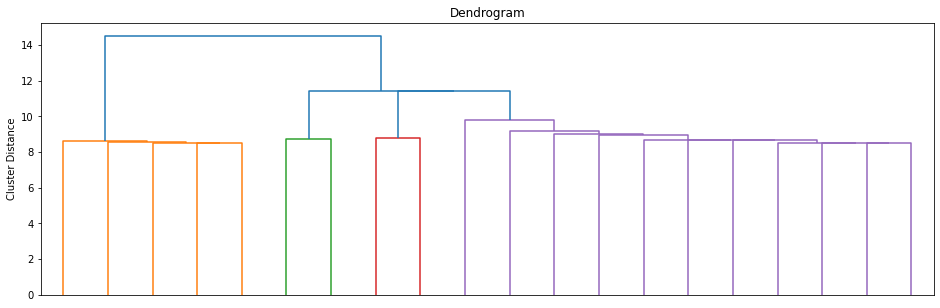

In [29]:
plt.figure( figsize=(16,5))
plt.title('Dendrogram')
plt.ylabel('Cluster Distance')

dn = dendrogram(LINKAGE_MATRIX, truncate_mode = 'lastp', p=20 )
plt.xticks([])

plt.show()

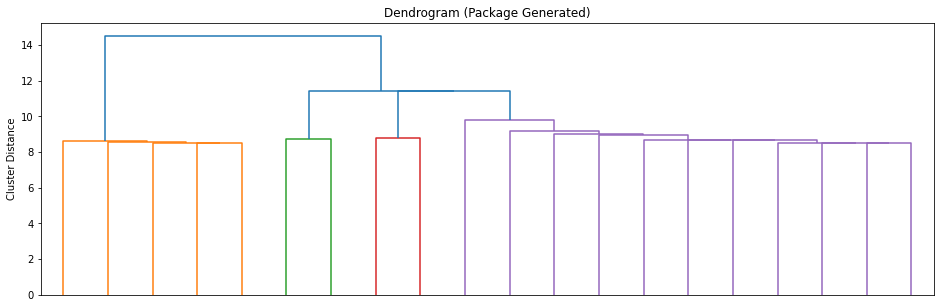

In [30]:
plt.figure( figsize=(16,5))
plt.title('Dendrogram (Package Generated)')
plt.ylabel('Cluster Distance')

dn = dendrogram( linkage(data, 'centroid'), truncate_mode = 'lastp', p=20 )
plt.xticks([])

plt.show()

In [31]:
print(PROTOTYPES[0], PROTOTYPES[1], PROTOTYPES[2], sep='\n*'+'='*70+'*\n')

(array([1.968     , 1.97333333, 1.98666667, 8.04266667, 2.45066667,
       5.92533333, 7.952     , 5.08266667, 1.00266667, 8.6       ,
       7.936     , 5.384     , 6.97866667, 2.53866667, 5.95733333,
       4.90133333, 7.94933333, 4.69866667, 4.95733333, 6.056     ]), 375)
*======================================================================*
(array([9.6       , 7.93454545, 7.56363636, 8.07636364, 8.05454545,
       6.53818182, 8.10909091, 5.08727273, 4.82181818, 2.01818182,
       1.90909091, 5.33818182, 3.98545455, 2.53454545, 2.07272727,
       5.06909091, 1.04363636, 4.64363636, 4.97090909, 2.03272727]), 275)
*======================================================================*
(array([4.92363636, 4.52545455, 7.66909091, 6.48181818, 2.84545455,
       6.69090909, 5.35272727, 4.86363636, 6.74909091, 4.74363636,
       1.43454545, 5.39454545, 3.36727273, 3.82      , 3.02181818,
       5.07636364, 7.32181818, 4.65636364, 2.48363636, 2.5       ]), 550)


In [32]:
prototype_df = pd.DataFrame( np.array([ prototype[0] for prototype in PROTOTYPES]), columns=columns )

In [33]:
prototype_df.round(2)

,Milk,ChildBby,Vegges,Cereal,Bread,Rice,Meat,Eggs,YogChs,Chips,Soda,Fruit,Corn,Fish,Sauce,Beans,Tortya,Salt,Scented,Salza
0,1.97,1.97,1.99,8.04,2.45,5.93,7.95,5.08,1.00,8.60,7.94,5.38,6.98,2.54,5.96,4.90,7.95,4.70,4.96,6.06
1,9.60,7.93,7.56,8.08,8.05,6.54,8.11,5.09,4.82,2.02,1.91,5.34,3.99,2.53,2.07,5.07,1.04,4.64,4.97,2.03
2,4.92,4.53,7.67,6.48,2.85,6.69,5.35,4.86,6.75,4.74,1.43,5.39,3.37,3.82,3.02,5.08,7.32,4.66,2.48,2.50


In [34]:
prototype_df.round()

,Milk,ChildBby,Vegges,Cereal,Bread,Rice,Meat,Eggs,YogChs,Chips,Soda,Fruit,Corn,Fish,Sauce,Beans,Tortya,Salt,Scented,Salza
0,2.0,2.0,2.0,8.0,2.0,6.0,8.0,5.0,1.0,9.0,8.0,5.0,7.0,3.0,6.0,5.0,8.0,5.0,5.0,6.0
1,10.0,8.0,8.0,8.0,8.0,7.0,8.0,5.0,5.0,2.0,2.0,5.0,4.0,3.0,2.0,5.0,1.0,5.0,5.0,2.0
2,5.0,5.0,8.0,6.0,3.0,7.0,5.0,5.0,7.0,5.0,1.0,5.0,3.0,4.0,3.0,5.0,7.0,5.0,2.0,3.0
